<hr style="border-top: 10px groove thistle; margin-top: 1px; margin-bottom: 1px"></hr>

# <font color=thistle>Pandas Series Exercises</font>

# Big Idea

>Change is a process, not an event. - Julie Dirksen (Design for How People Learn)

# Objectives 

By the end of the lesson and exercises, you will...

- know how to create and read data into a pandas Series.

- understand the vectorized functionality of the pandas Series.

- be able to apply various methods and attributes to a pandas Series.

- apply what you learned to solve previously seen problems in a different way.

<hr style="border-top: 10px groove thistle; margin-top: 1px; margin-bottom: 1px"></hr>

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rc('figure', figsize=(12, 6))

<hr style="border-top: 10px groove thistle; margin-top: 1px; margin-bottom: 1px"></hr>

## Exercises I

In [4]:
fruits_list = ["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]

In [5]:
fruits = pd.Series(fruits_list)

___

#### 1. 

Determine the number of elements in fruits.

In [6]:
fruits.size

17

In [5]:
fruits.shape

(17,)

In [8]:
fruits.count()

17

#### 2.

Output only the index from fruits.

In [11]:
list(range(17))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [9]:
fruits.index

RangeIndex(start=0, stop=17, step=1)

In [7]:
list(fruits.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

#### 3.

Output only the values from fruits.

In [12]:
fruits.values

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew', 'kiwi',
       'kiwi', 'kiwi', 'mango', 'blueberry', 'blackberry', 'gooseberry',
       'papaya'], dtype=object)

#### 4. 

Confirm the data type of the values in fruits.

In [15]:
fruits.dtype

dtype('O')

#### 5. 

Output only the first five values from fruits. Output the last three values. Output two random values from fruits.

In [17]:
print(fruits.head())

0          kiwi
1         mango
2    strawberry
3     pineapple
4    gala apple
dtype: object


In [18]:
fruits.tail(3)

14    blackberry
15    gooseberry
16        papaya
dtype: object

In [22]:
fruits.sample(2,random_state=1349)

15    gooseberry
13     blueberry
dtype: object

#### 6. 

Run `.describe()` method on the Series to see what describe returns for a series of strings.

- `fruits` is a non-numerical Series, so we get back a Series with: 
    - the count of elements in the `fruits` Series.
    - the count of the unique elements in the `fruits` Series.
    - the most frequently occuring element in the `fruits` Series. (mode)
    - the frequency of the most frequently occuring element.

In [23]:
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

___

#### 7. 

Run the code necessary to produce only the unique fruit names.

- The `.unique()` function returns the unique elements from a pandas Series in a NumPy array.

In [28]:
set(fruits.value_counts().index) == set(fruits.unique())

True

In [14]:
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [29]:
print(f'Calling the `.unique()` method on a Series returns a {type(fruits.unique())}.')

Calling the `.unique()` method on a Series returns a <class 'numpy.ndarray'>.


-  What if I wanted to know the number of unique elements in my Series?

In [16]:
fruits.nunique()

13

___

#### 8. 

Determine how many times each value occurs in the series.

In [30]:
fruits.value_counts()

kiwi                4
mango               2
watermelon          1
papaya              1
gala apple          1
blueberry           1
pineapple           1
honeycrisp apple    1
gooseberry          1
tomato              1
blackberry          1
strawberry          1
honeydew            1
dtype: int64

In [31]:
print(f'Calling the `.value_counts()` method on a Series returns a {type(fruits.value_counts())}.')

Calling the `.value_counts()` method on a Series returns a <class 'pandas.core.series.Series'>.


___

#### 9. 

Determine the most frequently occurring fruit name from the series.

- As always, there are several ways to acquire this information. I'm demonstrating a few here, but as is true in life, context is key. Your data needs will dictate the best method to use. Are you just exploring, do you need a single value, what data type do you want, etc.

In [32]:
fruits.value_counts()

kiwi                4
mango               2
watermelon          1
papaya              1
gala apple          1
blueberry           1
pineapple           1
honeycrisp apple    1
gooseberry          1
tomato              1
blackberry          1
strawberry          1
honeydew            1
dtype: int64

In [33]:
# If I know that there is only one row with the max value, this is cool.

fruits.value_counts().head(1)

kiwi    4
dtype: int64

In [34]:
# .idxmax() returns the index or row label with the max value. This returns only the first occurance of the max value.

fruits.value_counts().idxmax()

'kiwi'

In [39]:
# What if there's more than one row with the max value?

fruits.value_counts().nlargest(n=1, keep='last')

kiwi    4
dtype: int64

___

#### 10. 

Determine the least frequently occurring fruit name from the series.

In [40]:
# I can look at my value counts.

fruits.value_counts()

kiwi                4
mango               2
watermelon          1
papaya              1
gala apple          1
blueberry           1
pineapple           1
honeycrisp apple    1
gooseberry          1
tomato              1
blackberry          1
strawberry          1
honeydew            1
dtype: int64

In [41]:
# I have to set the n manually here.

fruits.value_counts().tail(11)

watermelon          1
papaya              1
gala apple          1
blueberry           1
pineapple           1
honeycrisp apple    1
gooseberry          1
tomato              1
blackberry          1
strawberry          1
honeydew            1
dtype: int64

In [45]:
# Can I use a more programmatic approach?

fruits.value_counts().nsmallest(n=1,keep='all')

watermelon          1
papaya              1
gala apple          1
blueberry           1
pineapple           1
honeycrisp apple    1
gooseberry          1
tomato              1
blackberry          1
strawberry          1
honeydew            1
dtype: int64

<hr style="border-top: 10px groove thistle; margin-top: 1px; margin-bottom: 1px"></hr>

## Exercises II

#### 1. 

Capitalize all the fruit strings in the series.

- The `.str` attribute gives me access to vectorized string functions or methods, so I can perform the same manipulation on every element in my Series. *Remember, unless I reassign this Series, my original Series has not been changed.*

In [ ]:
# string methods?use .str!

In [46]:
# look at fruits fruits.
# use a string method str.
# string method is captitalize capitalize()
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

#### 2. 

Count the letter "a" in all the string values (use string vectorization).

- The `.count()` string method will count the occurrence of a string or regex pattern in each string of a Series and return a new Series.

In [49]:
fruits.apply(lambda x: x + ' count of a: ' + str(x.count('a')))

0                 kiwi count of a: 0
1                mango count of a: 1
2           strawberry count of a: 1
3            pineapple count of a: 1
4           gala apple count of a: 3
5     honeycrisp apple count of a: 1
6               tomato count of a: 1
7           watermelon count of a: 1
8             honeydew count of a: 0
9                 kiwi count of a: 0
10                kiwi count of a: 0
11                kiwi count of a: 0
12               mango count of a: 1
13           blueberry count of a: 0
14          blackberry count of a: 1
15          gooseberry count of a: 0
16              papaya count of a: 3
dtype: object

In [50]:
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

#### 3. 

Output the number of vowels in each and every fruit.

- I can write a function to count the vowels in a single string and apply that function to every value in the Series.


- I can pass a regex pattern to the `.count()` string method that looks for any of the characters in the square brackets in each string value in my Series. *We will do A LOT more with regular expressions in the future, but I like this solution because it uses the vectorized functionality of my string method with my pandas Series.*

>`[..]` matches any single character in the square brackets and `[^..]` matches any single character not in the square brackets.

In [54]:
vowels = list('aeiou')
vowels

['a', 'e', 'i', 'o', 'u']

In [55]:
def count_vowels(fruit):
    return len([let for let in fruit.lower() if let in vowels])

In [30]:
fruits.apply(count_vowels)

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

___

In [58]:
# [ ] - where the square brackets denote arbitrary presence of their contents.

vowel_counts = fruits.str.lower().str.count('[aeiou]')
vowel_counts

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [59]:
# Want to see the name and vowel_counts? Here's one way to handle that...the index is pretty cool!

fruity_vowels = pd.DataFrame({'fruits': fruits, 'vowel_count': vowel_counts})
fruity_vowels

,fruits,vowel_count
0,kiwi,2
1,mango,2
2,strawberry,2
3,pineapple,4
4,gala apple,4
5,honeycrisp apple,5
6,tomato,3
7,watermelon,4
8,honeydew,3
9,kiwi,2


####  4.

Write the code to get the longest string from the fruits series.

- Again, I'll demonstrate a couple of ways to acquire this information. 

- If you want to learn more about using the python `.max()` function with a key, [here](https://www.programiz.com/python-programming/methods/built-in/max) is a cool tutorial.

In [60]:
fruits

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [61]:
fruits.str.len()

0      4
1      5
2     10
3      9
4     10
5     16
6      6
7     10
8      8
9      4
10     4
11     4
12     5
13     9
14    10
15    10
16     6
dtype: int64

In [62]:
fruits.str.len().max()

16

In [63]:
# Find the max length for the elements in the Series.

max_len = fruits.str.len().max()

In [37]:
# Create a boolean Series for element in the Series meeting my condition.

bool_fruits = fruits.str.len() == max_len
bool_fruits

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
dtype: bool

In [38]:
# Use indexing with my boolean Series.

fruits[bool_fruits]

5    honeycrisp apple
dtype: object

**There is however this little gem.**

In [64]:
# This returns the string value.

max(fruits, key=len)

'honeycrisp apple'

___

#### 5. 

Find the fruit(s) with 5 or more letters in the name.

In [40]:
# Create the boolean Series and pass it as a selector to my indexing operator.

fruits.str.len() > 4

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12     True
13     True
14     True
15     True
16     True
dtype: bool

In [41]:
fruits[fruits.str.len() > 4]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

___

#### 6. 

Use the `.apply` method with a lambda function to find the fruit(s) containing the letter "o" two or more times.

- Here I'm showing two steps, so you can see what's going on step by step.

    1. I apply a lambda function that returns a boolean Series with values of `True` if the value in my `fruits` series meets the condition of having two or more 'o' letters and a `False` if the value in my `fruits` series does not meet the condition.
    
    2. I want the actual values from my `fruits` Series that evaluate to `True`, so I'm going to pass my boolean Series as a selector to the indexing operator `[]` and get a subset of my original Series.

In [69]:
fruits[fruits.str.count('o') > 1]

6         tomato
15    gooseberry
dtype: object

In [42]:
# Read this lambda function as, 'Return to me the fruit if the fruit meets my condition.'
# By passing this to the `apply()` function, it applies my lambda function to each value in my series `fruits`.

fruits.apply(lambda fruit: fruit.count('o') > 1)

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
dtype: bool

In [70]:
# Read this boolean indexing as, 'Return to me the value in the `fruits` Series WHERE my value is True.'

fruits[fruits.apply(lambda fruit: fruit.count('o') > 1)]

6         tomato
15    gooseberry
dtype: object

In [71]:
# I can also solve this using a vectorized string method.

fruits.str.count('o')

0     0
1     1
2     0
3     0
4     0
5     1
6     2
7     1
8     1
9     0
10    0
11    0
12    1
13    0
14    0
15    2
16    0
dtype: int64

In [72]:
# Return to me the value in the `fruits` Series WHERE my value is True.

fruits[fruits.str.count('o') >= 2]

6         tomato
15    gooseberry
dtype: object

___

#### 7. 

Write the code to get only the string values containing the substring "berry".

- I'm going to use the same pattern I used above by creating a boolean Series for fruits that contain the string `berry` and using that boolean Series as a selector for a subset of data from my `fruits` Series.

In [73]:
fruits.apply(lambda x: 'berry' in(x))

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14     True
15     True
16    False
dtype: bool

In [46]:
fruits.str.contains('berry')

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14     True
15     True
16    False
dtype: bool

In [47]:
fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

___

#### 8. 

Write the code to get only the string values containing the substring "apple".

- This is the same as above but with a different substring.

In [77]:
fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

___

#### 9. 

Which string value contains the most vowels?

- I can find the max value of vowel counts and create a bool Series as a filter for my fruits Series to return any and all values that have the highest number of vowels.

In [49]:
# Get the count of vowels like I did in a previous problem.

vowel_counts = fruits.str.count('[aeiou]')
vowel_counts

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [50]:
# Find the max count of vowels

max_vowels = (fruits.str.count('[aeiou]')).max()
max_vowels

5

In [51]:
# Create a boolean Series comparing the count of vowels in my original Series to my max count

bool_series = fruits.str.count('[aeiou]') == max_vowels
bool_series

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
dtype: bool

In [52]:
# Use indexing to return rows that meet my condition.

fruits[bool_series]

5    honeycrisp apple
dtype: object

<hr style="border-top: 10px groove thistle; margin-top: 1px; margin-bottom: 1px"></hr>

### Exercises Part III

In [78]:
string = 'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'
type(string)

str

In [79]:
letters = pd.Series(list(string))
letters

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

In [80]:
type(letters)

pandas.core.series.Series

#### 1. 

Which letter occurs the most frequently in the letters Series?

In [81]:
# I can sort my value counts and use a .head() and .tail().

letters.value_counts().sort_values(ascending=False)

y    13
p    12
w    10
k     9
n     9
b     9
m     9
q     8
o     8
r     8
a     8
d     8
c     8
h     8
x     8
u     7
z     7
v     7
t     7
j     6
f     6
e     6
i     5
s     5
g     5
l     4
dtype: int64

In [57]:
# I can do this more programatically.

letters.value_counts().nlargest(n=1, keep='all')

y    13
dtype: int64

#### 2. 

Which letter occurs the least frequently?

In [58]:
letters.value_counts().nsmallest(n=1, keep='all')

l    4
dtype: int64

___

#### 3. 

How many vowels are in the Series?

In [59]:
# Count the vowels.

letters.str.lower().str.count('[aeiou]')

0      0
1      0
2      0
3      1
4      0
      ..
195    0
196    1
197    0
198    1
199    0
Length: 200, dtype: int64

In [60]:
# Sum all the vowels in the Series.

letters.str.lower().str.count('[aeiou]').sum()

34

In [82]:
# I can also use the .isin method with a list of vowels.

(letters.str.lower().isin(['a', 'e', 'i', 'o', 'u'])).sum()

34

___

#### 4. 

How many consonants are in the Series?

In [84]:
# Identify and total the consonants in the Series

letters.str.lower().str.count('[^aeiou]').sum()

166

In [87]:
(~letters.str.lower().isin(['a', 'e', 'i', 'o', 'u']))

0       True
1       True
2       True
3      False
4       True
       ...  
195     True
196    False
197     True
198    False
199     True
Length: 200, dtype: bool

In [63]:
# I can simply use the tilde to return the opposite, the consonants.

(~letters.str.lower().isin(['a', 'e', 'i', 'o', 'u'])).sum()

166

___

#### 5. 

Create a Series that has all of the same letters but uppercased.

In [90]:
letters.str.upper()

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

___

#### 6. 

Create a bar plot of the frequencies of the 6 most commonly occuring letters.

In [91]:
top7 = letters.value_counts().head(7)

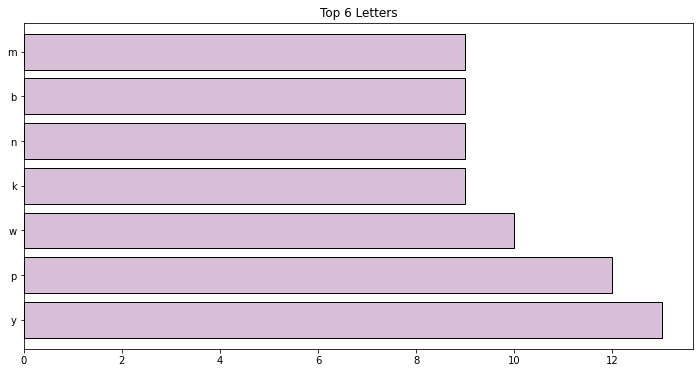

In [95]:
top7.plot(kind='barh', 
        color='thistle',
        ec='black',
        width=.8)

plt.title('Top 6 Letters')

# I wanted the most frequent letter at the top, so I chose to invert the y-axis.
# plt.gca().invert_yaxis()

plt.show()

In [96]:
nums_list = ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']

In [97]:
numbers = pd.Series(nums_list)
numbers

0       $796,459.41
1           $278.60
2       $482,571.67
3     $4,503,915.98
4      $2,121,418.3
5      $1,260,813.3
6        $87,231.01
7     $1,509,175.45
8     $4,138,548.00
9     $2,848,913.80
10      $594,715.39
11    $4,789,988.17
12     $4,513,644.5
13    $3,191,059.97
14    $1,758,712.24
15    $4,338,283.54
16    $4,738,303.38
17    $2,791,759.67
18      $769,681.94
19      $452,650.23
dtype: object

___

#### 7. 

What is the data type of the numbers Series?

- I can see above that the dtype is `object`, but I'll also use the `.dtype` attribute for demonstation.

In [98]:
numbers.dtype

dtype('O')

___

#### 8.

How many elements are in the number Series?

In [100]:
numbers.size

20

___

#### 9. 

Perform the necessary manipulations by accessing Series attributes and methods to convert the numbers Series to a numeric data type.

- This is the fun part of getting a Series with dollar signs and commas in it! Before I can just convert these values from objects to floats, I have to remove those symbols.

In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
numbers.str.replace('$', '').str.replace(',','')

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4      2121418.3
5      1260813.3
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12     4513644.5
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: object

In [107]:
# Gotta love method chaining! Check the dtype at the bottom of the Series.

numbers_as_floats = numbers.str.replace('$', '').str.replace(',', '').astype('float')

In [109]:
numbers_as_floats

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

In [110]:
# Assign to a variable.

float_series = numbers.str.replace('$', '').str.replace(',', '').astype('float')
float_series

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

In [111]:
print(f'float_series contains {float_series.dtype} values.')

float_series contains float64 values.


___

#### 10. 

Run the code to discover the maximum value from the Series.

In [113]:
numbers.describe()

count              20
unique             20
top       $482,571.67
freq                1
dtype: object

In [112]:
float_series.describe()

count    2.000000e+01
mean     2.284406e+06
std      1.735261e+06
min      2.786000e+02
25%      7.259403e+05
50%      1.940065e+06
75%      4.188482e+06
max      4.789988e+06
dtype: float64

In [74]:
float_series.max()

4789988.17

___

#### 11.

Run the code to discover the maximum value from the Series.

In [115]:
float_series.min()

278.6

___

#### 12.

What is the range of the values in the Series?

In [116]:
float_series.max() - float_series.min()

4789709.57

___

#### 13. 

Bin the data into 4 equally sized intervals and show how many values fall into each bin.

- I can do this with `.value_counts()` if I just want to bin values and get a frequency count for each bin.

- If I want to customize bin labels and/or edges, I can use `pd.cut()` and chain `.value_counts()` to get a count.

In [77]:
# I can do this with value_counts().

float_series.value_counts(bins=4)

(-4511.111, 1197705.993]      7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

In [78]:
# Using `.cut()` to convert continuous values into categories. Now I have to group them.

pd.cut(float_series, 4)

0        (-4511.11, 1197705.993]
1        (-4511.11, 1197705.993]
2        (-4511.11, 1197705.993]
3      (3592560.778, 4789988.17]
4     (1197705.993, 2395133.385]
5     (1197705.993, 2395133.385]
6        (-4511.11, 1197705.993]
7     (1197705.993, 2395133.385]
8      (3592560.778, 4789988.17]
9     (2395133.385, 3592560.778]
10       (-4511.11, 1197705.993]
11     (3592560.778, 4789988.17]
12     (3592560.778, 4789988.17]
13    (2395133.385, 3592560.778]
14    (1197705.993, 2395133.385]
15     (3592560.778, 4789988.17]
16     (3592560.778, 4789988.17]
17    (2395133.385, 3592560.778]
18       (-4511.11, 1197705.993]
19       (-4511.11, 1197705.993]
dtype: category
Categories (4, interval[float64]): [(-4511.11, 1197705.993] < (1197705.993, 2395133.385] < (2395133.385, 3592560.778] < (3592560.778, 4789988.17]]

In [79]:
# I group the observations above by bin/category and get a count of values in each bin/category.

pd.cut(float_series, 4).value_counts().sort_index()

(-4511.11, 1197705.993]       7
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
(3592560.778, 4789988.17]     6
dtype: int64

___

#### 14. 

Plot the binned data in a meaningful way. Be sure to include a title and axis labels.

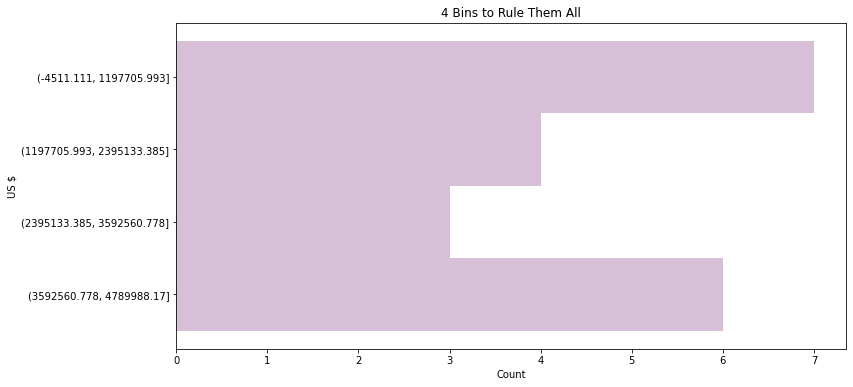

In [80]:
float_series.value_counts(bins=4).sort_index(ascending=False).plot(kind='barh', 
                                                                   color='thistle',  
                                                                   width=1)

plt.title('4 Bins to Rule Them All')
plt.xlabel('Count')
plt.ylabel('US $')
plt.show()

___

In [117]:
scores_list = [60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]
scores = pd.Series(scores_list)

In [118]:
# Validate that scores is a Series object.

type(scores)

pandas.core.series.Series

#### 15.

How many elements are in the exam_scores Series?

In [119]:
# I have 20 values in my Series

scores.size

20

___

#### 16. 

Run the code to discover the minimum, the maximum, the mean, and the median scores for the exam_scores Series.

In [120]:
# I can see all the descriptive statistics about the numerical Series using the `.describe()` method.

scores.describe()

count    20.000000
mean     78.150000
std      11.352139
min      60.000000
25%      70.500000
50%      79.000000
75%      85.250000
max      96.000000
dtype: float64

**I can one-at-a-time it.**

- Using the functions offers me parameters for more flexibility if I need it.

In [121]:
scores.min()

60

In [122]:
scores.max()

96

In [123]:
scores.mean()

78.15

In [124]:
scores.median()

79.0

___

#### 17.

Plot the Series in a meaningful way and make sure your chart has a title and axis labels.

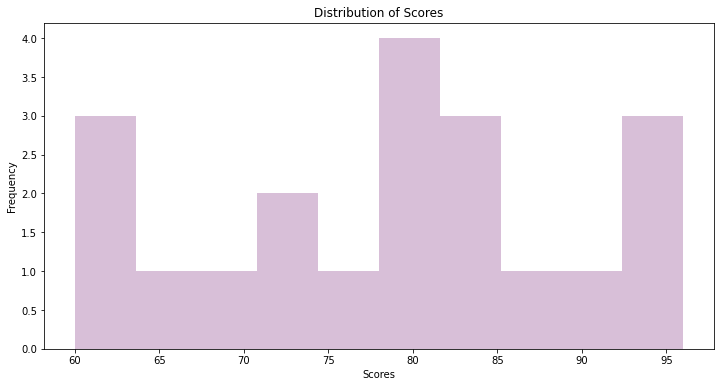

In [89]:
scores.plot.hist(color='thistle')

plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.show()

___

#### 18. 

Write the code necessary to implement a curve for your exam_grades Series and save this as curved_grades. Add the necessary points to the highest grade to make it 100, and add the same number of points to every other score in the Series as well.

In [125]:
# Find the amount to curve my grades.

curve = 100 - scores.max()
curve

4

In [126]:
# Create curved_scores series.

curved_scores = scores + curve
curved_scores

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

#### 19. 

Use a method to convert each of the numeric values in the curved_grades Series into a categorical value of letter grades. For example, 86 should be a 'B' and 95 should be an 'A'. Save this as a Series named letter_grades.

- A = 90-100

- B = 80-89

- C = 75-79

- D = 70-74

- F = < 70

In [127]:
# Define bin edges.
bin_edges = [0, 70, 75, 80, 90, 101]

# Create a list of bin labels; you should have one less than bin edges.
bin_labels = ['F', 'D', 'C', 'B', 'A']

# Use the .cut() function to create 5 bins as defined and label.
letter_grades = pd.cut(curved_scores, bins=bin_edges, labels=bin_labels)
letter_grades

0     F
1     B
2     C
3     F
4     A
5     D
6     F
7     B
8     A
9     B
10    F
11    C
12    D
13    B
14    A
15    B
16    B
17    A
18    B
19    B
dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

#### 20.

Plot your new categorical letter_grades Series in a meaninful way and include a title and axis labels.

<AxesSubplot:>

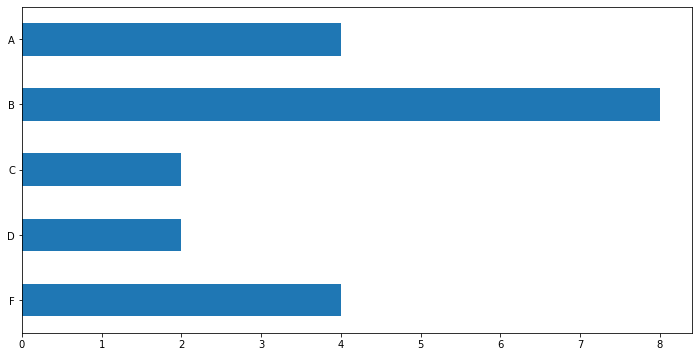

In [130]:
letter_grades.value_counts().sort_index().plot.barh()

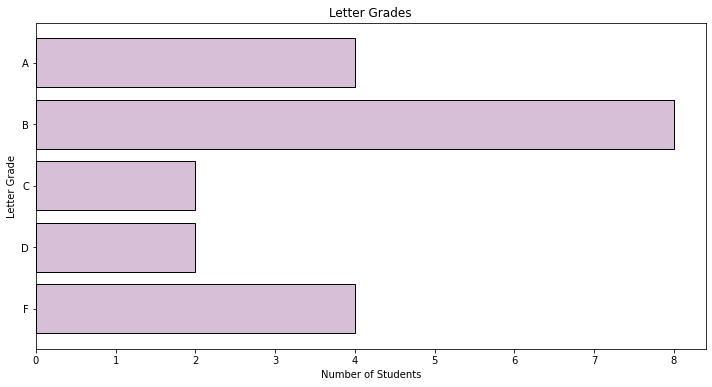

In [133]:
# Tet the frequency of letter_grades values using value_count, sorted by index, plot.

letter_grades.value_counts().sort_index().plot.barh(color='thistle',
                                                    ec='black',
                                                    width=.8)

plt.title('Letter Grades')
plt.xlabel('Number of Students')
plt.ylabel('Letter Grade')

plt.show()

___

In [134]:
# Define bin edges.
bin_edges = [0, 70, 75, 80, 90, 101]

# Create a list of bin labels; you should have one less than bin edges.
bin_labels = ['F', 'D', 'C', 'B', 'A']

# Check out counts
pd.cut(curved_scores, bins=bin_edges, labels=bin_labels).value_counts().sort_index()

F    4
D    2
C    2
B    8
A    4
dtype: int64

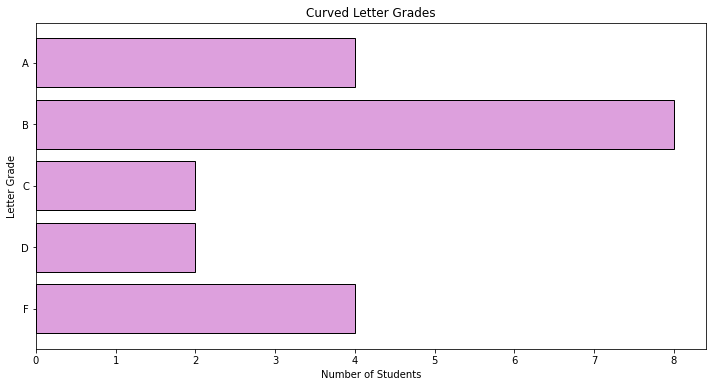

In [135]:
# Create and plot bins
pd.cut(curved_scores, 
       bins=bin_edges, 
       labels=bin_labels,
       include_lowest=True).value_counts().sort_index().plot.barh(color='plum',
                                                                  ec='black',
                                                                  width=.8)

plt.title('Curved Letter Grades')
plt.xlabel('Number of Students')
plt.ylabel('Letter Grade')

plt.show()

___

In [139]:
df = pd.DataFrame({
    'grades': pd.cut(
        scores, 
        bins=bin_edges, 
        labels=bin_labels,
        include_lowest=True).value_counts().sort_index(),
    'curved_grades':pd.cut(
        curved_scores, 
        bins=bin_edges, 
        labels=bin_labels).value_counts().sort_index()})

In [140]:
df

,grades,curved_grades
F,5,4
D,3,2
C,3,2
B,5,8
A,4,4


<AxesSubplot:>

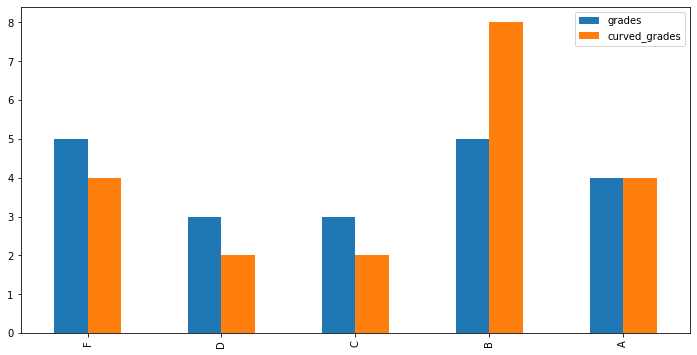

In [141]:
df[['grades','curved_grades']].plot(kind='bar')

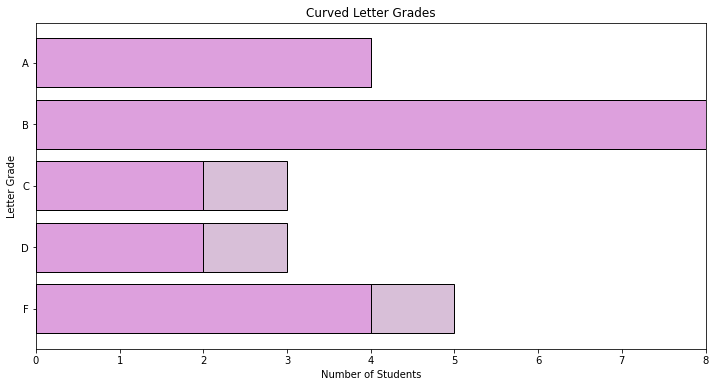

In [138]:
# Define bin edges.
bin_edges = [0, 70, 75, 80, 90, 101]

# Create a list of bin labels; you should have one less than bin edges.
bin_labels = ['F', 'D', 'C', 'B', 'A']

##################### first plot #################################

# plt.subplot(2,1,1)

# code to plot letter grades

pd.cut(scores, 
       bins=bin_edges, 
       labels=bin_labels,
       include_lowest=True).value_counts().sort_index().plot.barh(color='thistle',
                                                                  ec='black',
                                                                  width=.8, label= 'raw_grade')

# Titles and labels for plot 1

plt.title('Letter Grades')
plt.xlabel('Number of Students')
plt.ylabel('Letter Grade')
plt.xlim(0, 8)

# plt.show()

##################### second plot ################################

# plt.subplot(2,1,2)

# code to plot curved letter grades

pd.cut(curved_scores, 
       bins=bin_edges, 
       labels=bin_labels).value_counts().sort_index().plot.barh(color='plum',
                                                                ec='black',
                                                                width=.8, label='curved grade')

# Titles and labels for plot 2

plt.title('Curved Letter Grades')
plt.xlabel('Number of Students')
plt.ylabel('Letter Grade')

plt.show()